In [63]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt


In [64]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.models import Model

In [65]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [66]:
print(X_train.shape)

(60000, 28, 28)


In [67]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [68]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()
(0.0, 1.0)

(0.0, 1.0)

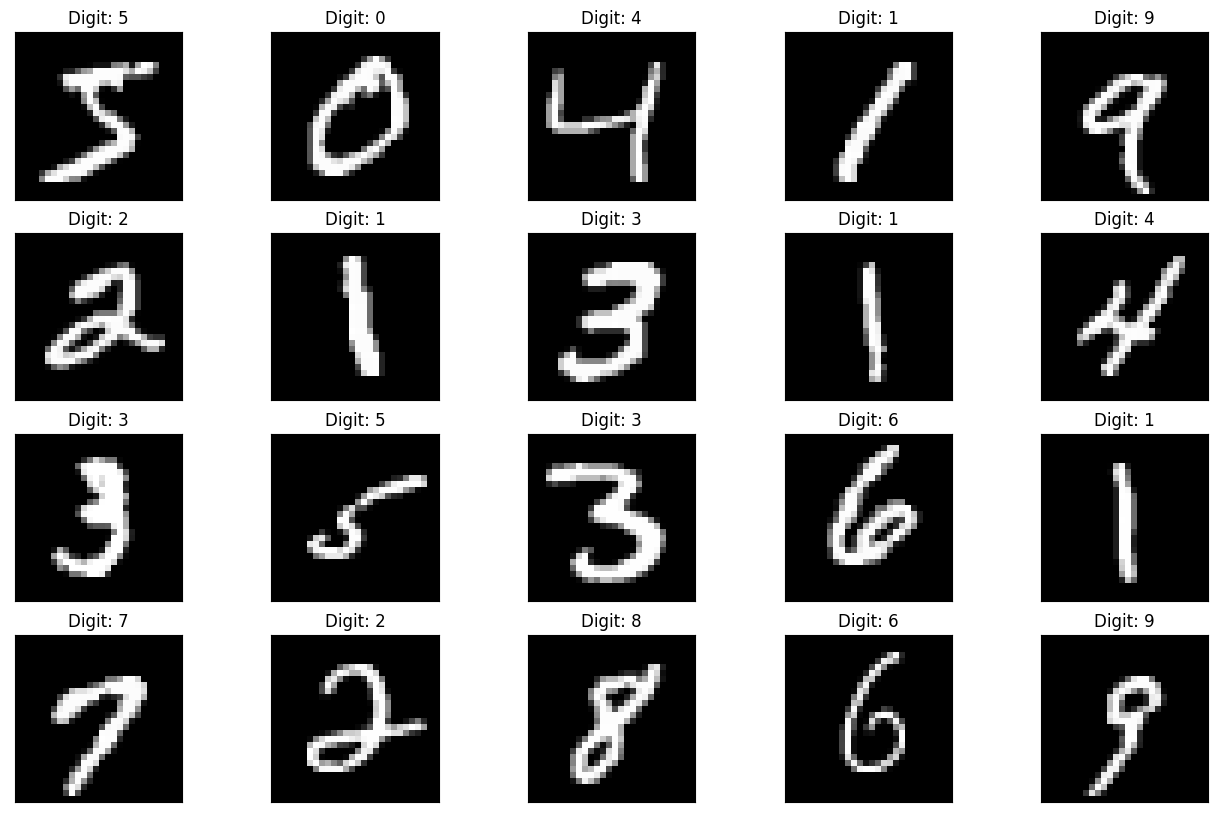

In [69]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [70]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [72]:
y_train[0:20]
#array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],dtype=uint8)

SyntaxError: invalid syntax (2971107644.py, line 2)

In [73]:
model = Sequential([
Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Flatten(),
Dense(100, activation="relu"),
Dense(10, activation="softmax")
])

In [74]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
optimizer=optimizer,
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               540900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [76]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.2427 - accuracy: 0.9267
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0804 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0512 - accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0365 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0268 - accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0200 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0148 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0111 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0075 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 35s 19m

1/1 [==============================] - 0s 30ms/step


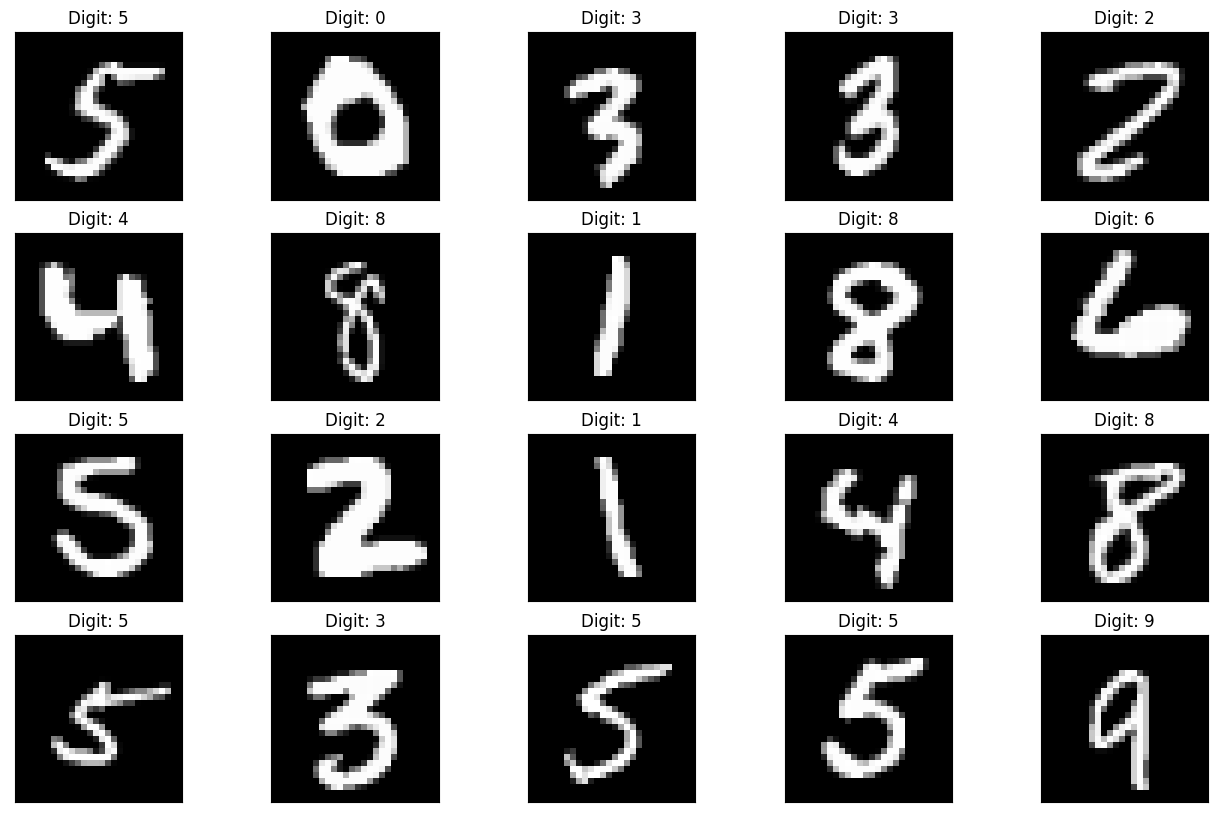

In [77]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0],axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [78]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 2s 5ms/step


0.9861

In [79]:
score=model.evaluate(X_test,y_test,verbose=0)

In [80]:
print('Testloss:',score[0])
print('Test accuracy:', score[1])

Testloss: 0.0445203073322773
Test accuracy: 0.9861000180244446


NameError: name 'model_log' is not defined

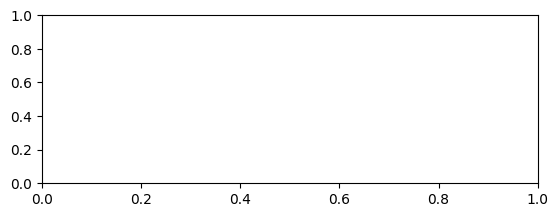

In [81]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])

NameError: name 'history' is not defined

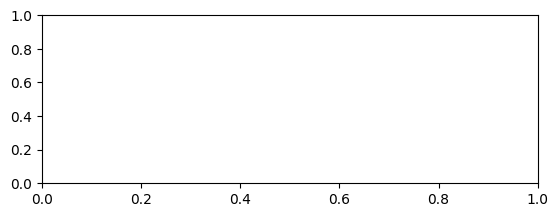

In [82]:
plt.subplot(211)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')